In [14]:
import pandas as pd
import numpy as np 
import altair as alt
import matplotlib.pyplot as plt
import folium

trends = pd.read_csv('shopping_trends_updated.csv')

Static Plot #1: Facet Figure of Bar Plots representing the popularity of items for different seasons

In [22]:
agg_data = trends.groupby(['Item Purchased', 'Season']).size().reset_index(name='Count')
colors = ["brown", "lightgreen", "yellow", "lightgray"]

alt.Chart(agg_data).mark_bar().encode(
    x=alt.X('Item Purchased', title='Items'),
    y=alt.Y('Count', title='Number of Items'),
    color=alt.Color('Season:N', scale=alt.Scale(range=colors))
).properties(
    width=400,
    height=200,
    
).facet(
    column='Season:N'
).resolve_scale(
    x='independent'
).properties(
     title=alt.TitleParams(text='Popularity of Items for Each Seasons', align='center')
)


alt.FacetChart(...)

Static Plot #2: Facet Figure of Contour maps demonstrating color preferences of different states during different seasons

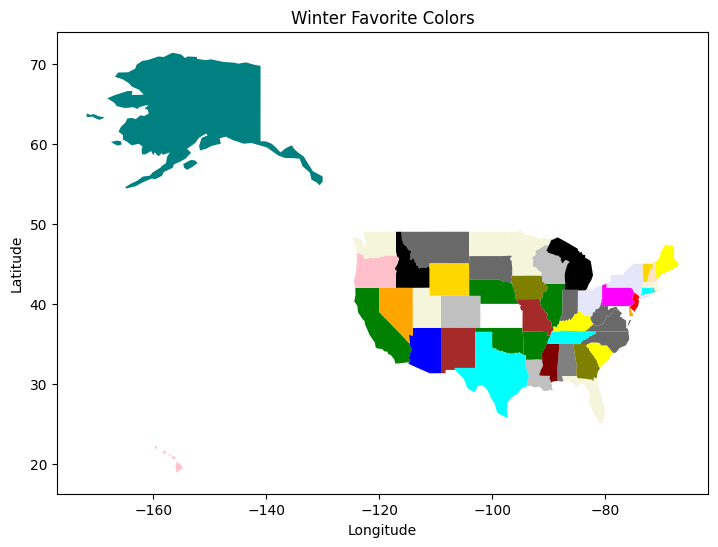

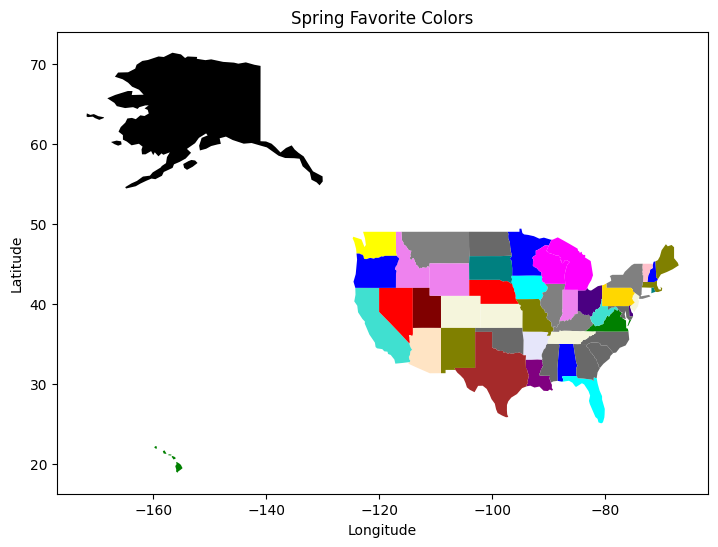

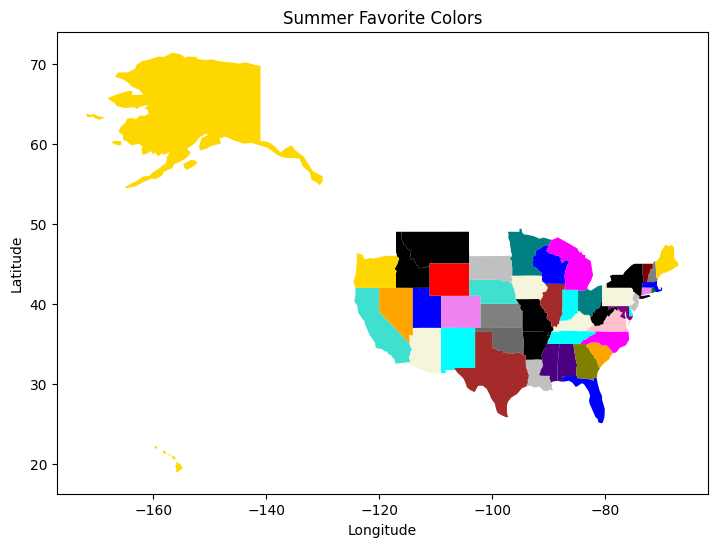

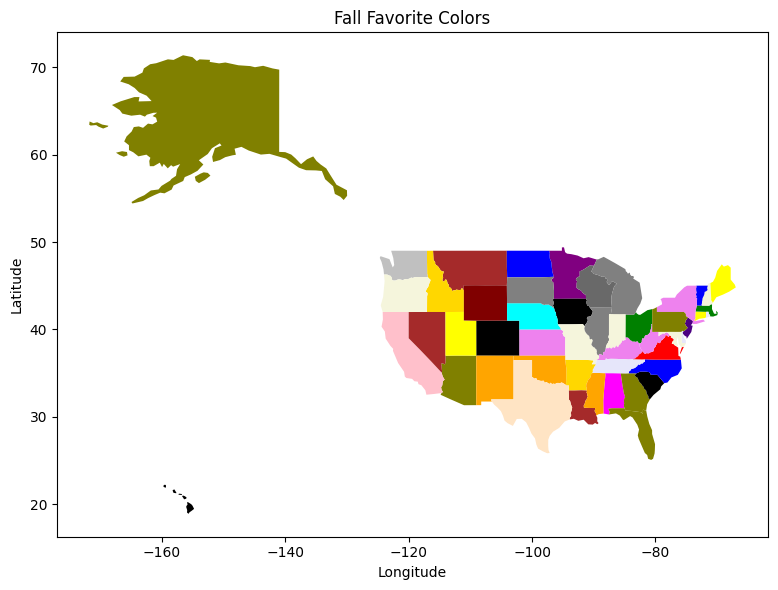

In [3]:
import geopandas as gpd
seasons = ["Winter","Spring","Summer","Fall"]
state = gpd.read_file("ne_110m_admin_1_states_provinces/ne_110m_admin_1_states_provinces.shp")
state.head()
state["Location"] = state["name"]


for season in seasons:
    seasonDf = trends[trends["Season"] == season]
    colorCounts = seasonDf.groupby(['Location', 'Color']).size().reset_index(name='Count')

    indices = colorCounts.groupby('Location')['Count'].idxmax()

    colors = colorCounts.loc[indices].reset_index(drop=True)
    statesWithFavoriteColor = pd.merge(state, colors, on='Location')
    statesWithFavoriteColor['Color'] = statesWithFavoriteColor['Color'].replace({'Peach': 'bisque'})
    statesWithFavoriteColor['Color'] = statesWithFavoriteColor['Color'].replace({'Charcoal': 'dimgray'})

    favColors = dict(zip(statesWithFavoriteColor['Location'], statesWithFavoriteColor['Color']))

    fig, ax = plt.subplots(figsize=(10, 6))
    statesWithFavoriteColor.plot(ax=ax, color=[favColors[state] for state in statesWithFavoriteColor['Location']], legend=True)
    plt.title(season + ' Favorite Colors')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')


plt.tight_layout()
plt.show()



Interactive #1: Geospatial map of US for each states primary purchasing Item and payment method 

In [27]:

item_counts = trends.groupby(['Location', 'Item Purchased']).size().reset_index(name='Count')
indicesItem = item_counts.groupby('Location')['Count'].idxmax()
items = item_counts.loc[indicesItem].reset_index(drop=True)

method_counts = trends.groupby(['Location', 'Payment Method']).size().reset_index(name='Count')
indicesMethod = method_counts.groupby('Location')['Count'].idxmax()
methods = method_counts.loc[indicesMethod].reset_index(drop=True)

cat_counts = trends.groupby(['Location', 'Category']).size().reset_index(name='Count')
indicesCats = cat_counts.groupby('Location')['Count'].idxmax()
cats = cat_counts.loc[indicesCats].reset_index(drop=True)

poptrends = pd.merge(items, state, on='Location')
poptrends2 = pd.merge(poptrends, methods, on='Location')
geopoptrends = pd.merge(poptrends2, cats, on='Location')

geopoptrends = gpd.GeoDataFrame(geopoptrends,geometry='geometry')

In [29]:
m = geopoptrends.explore(
    column="Category",
    tooltip='Location',
    popup=['Item Purchased', 'Payment Method'],
    scheme='quantiles',
    name='Most Popular Trends'
)

folium.TileLayer("CartoDB positron", show=False).add_to(m)
folium.LayerControl().add_to(m)

m.save("mostPopularTrendsINT1.html")
m



Interactive #2: Bar-Plot for the amount being spent at different age ranges and gender

In [34]:
options = sorted(trends["Age"].unique())

input_dropdown = alt.binding_select(options=options, name="Age")

selection = alt.selection_single(fields=['Age'], bind=input_dropdown, name="Select")

chart1 = alt.Chart(trends).mark_bar().encode(
    x='Gender:N',
    y='Purchase Amount (USD):Q',
    color=alt.Color('Gender:N', scale=alt.Scale(range=["pink", "blue"]))
).add_selection(
    selection
).transform_filter(
    selection
).properties(
    width=450,
    height=650,
    title="Purchase Amount by Gender and Age",
)
chart1.save('GenderAgePurchaseAmountINT2.html')
chart1 


alt.Chart(...)